## Extension: Analyzing the impact of Boston Police Department presence and activity on Community Safety


- Are the crime rates lower in areas with higher police presence? 
    - Are they higher in areas with lower police presence? 
- Is there any relationship between police spending (specifically overtime) and improvements in community safety?
    - Is there any relationship between police spending and crime rates in Boston?
    - Is there any relationship between the police budget and crime rates in Boston?



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
import pandas as pd
from tqdm import tqdm
import time 
import numpy as np
# from uszipcode import SearchEngine

field2015 =  pd.read_csv("../data/Field Activity/fieldcontactforpublic2015.csv")
field2016 =  pd.read_csv("../data/Field Activity/fieldcontactforpublic2016.csv")
field2017 = pd.read_csv("../data/Field Activity/rms_fieldcontacts_for_public_2017_202003111424.csv")
field2018 = pd.read_csv("../data/Field Activity/rms_fieldcontacts_for_public_2018_202003111433.csv")
field2019 =pd.read_csv("../data/Field Activity/rms_fieldcontacts_for_public_2019.csv")
field2020 = pd.read_csv("../data/Field Activity/mark43_fieldcontacts_for_public_2020_202104151551.csv")
field2021 =   pd.read_csv("../data/Field Activity/fio_2021-2.csv")
field2022 =  pd.read_csv("../data/Field Activity/fio-records-2022-mark43-fieldcontact-table.csv")


In [20]:
# looking at total field encounters
size15 = len(field2015)
size16 = len(field2016)
size17 = len(field2017)
size18 = len(field2018)
size19 = len(field2019)
size20 = len(field2020)
size21 = len(field2021)
size22 = len(field2022)

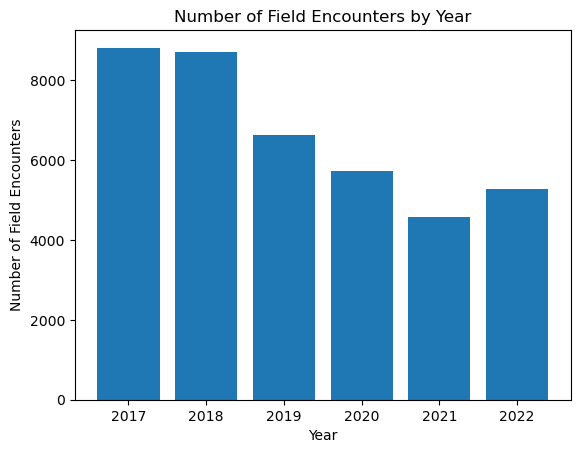

In [4]:
years = [2017, 2018, 2019, 2020, 2021, 2022]
sizes = [size17, size18, size19, size20, size21, size22]

# Create a bar graph
plt.bar(years, sizes)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Field Encounters')
plt.title('Number of Field Encounters by Year')

# Show the graph
plt.show()

In [5]:

crime15 =  pd.read_csv("../data/Crime Incident/crime15.csv")
crime16 =  pd.read_csv("../data/Crime Incident/crime16.csv")
crime17 =  pd.read_csv("../data/Crime Incident/crime17.csv")
crime18 =  pd.read_csv("../data/Crime Incident/crime18.csv")
crime19 =  pd.read_csv("../data/Crime Incident/crime19.csv")
crime20 =  pd.read_csv("../data/Crime Incident/crime20.csv")
crime21 =  pd.read_csv("../data/Crime Incident/crime21.csv")
crime22 =  pd.read_csv("../data/Crime Incident/crime22.csv")

C:\Users\opres\AppData\Local\Temp\ipykernel_13000\3338638598.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime19 =  pd.read_csv("../data/Crime Incident/crime19.csv")
C:\Users\opres\AppData\Local\Temp\ipykernel_13000\3338638598.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime20 =  pd.read_csv("../data/Crime Incident/crime20.csv")
C:\Users\opres\AppData\Local\Temp\ipykernel_13000\3338638598.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime21 =  pd.read_csv("../data/Crime Incident/crime21.csv")
C:\Users\opres\AppData\Local\Temp\ipykernel_13000\3338638598.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime22 =  pd.read_csv("../data/Crime Incident/crime22.csv")


In [6]:
numberCrimes15 = len(crime15)
numberCrimes16 = len(crime16)
numberCrimes17 = len(crime17)
numberCrimes18= len(crime18)
numberCrimes19 = len(crime19)
numberCrimes20 = len(crime20)
numberCrimes21 = len(crime21)
numberCrimes22 = len(crime22)
print(numberCrimes15)
print(numberCrimes16)

53597
99430


In [7]:
import numpy as np
operatingBudget = pd.read_csv("../data/Operating Budget/fy24-adopted-operating-budget.csv")
policeBudget = operatingBudget[operatingBudget['Dept'].str.contains("Police Department")]
policeBudget = policeBudget.replace('#Missing', np.nan)

In [8]:
pd.options.display.float_format = '{:.0f}'.format
policeBudget['FY21 Actual Expense'] = policeBudget['FY21 Actual Expense'].astype(float)
policeBudget['FY22 Actual Expense'] = policeBudget['FY22 Actual Expense'].astype(float)
policeBudget['FY23 Appropriation'] = policeBudget['FY23 Appropriation'].astype(float)
policeBudget['FY24 Adopted'] = policeBudget['FY24 Adopted'].astype(float)


columns = ['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']
policeBudget[columns] = policeBudget[columns].applymap(lambda x: 0 if x < 0 else x)

In [9]:
#14, 15 https://www.boston.gov/sites/default/files/embed/file/2016-10/12_public_safety_cabinet.pdf
#16, 17 https://www.boston.gov/sites/default/files/embed/file/2019-04/v3_11-_19_a_public-safety-cabinet.pdf
#18, 19, 20 https://www.boston.gov/sites/default/files/file/2020/10/V3%2012-%2021%20A%20Public-Safety-Cabinet.pdf
budget14 = 321000297
budget15 = 337310895
budget16 = 348887844
budget17 = 364594820
budget18 = 399924493
budget19 = 416762373
budget20 = 414306876


In [10]:
budget21 = policeBudget['FY21 Actual Expense'].sum()
budget22 = policeBudget['FY22 Actual Expense'].sum()
budget23 = policeBudget['FY23 Appropriation'].sum()
budget24 = policeBudget['FY24 Adopted'].sum()
print(budget21)
print(budget22)

422917516.8999999
420411576.37


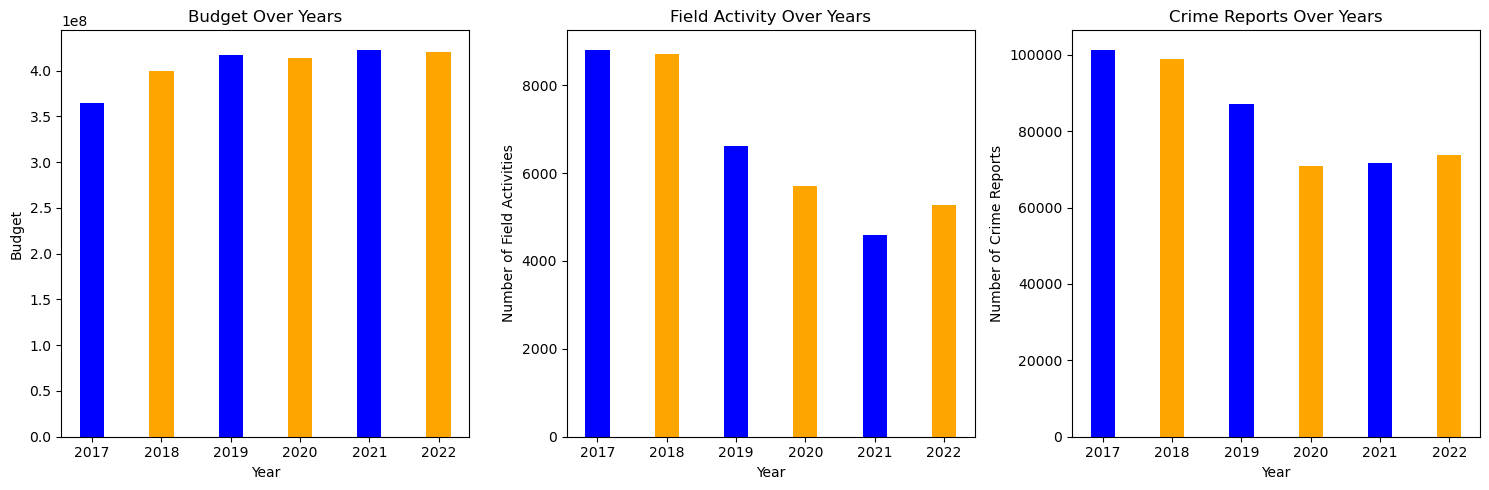

In [11]:
years = [i for i in range(2017, 2023)]
field = [size17, size18, size19, size20, size21, size22]
budgets = [budget17, budget18, budget19, budget20, budget21, budget22]
crimes = [numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

# Set up positions for the bars
bar_width = 0.35
index = np.arange(len(years))
colors = ['blue', 'orange']

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot budget bar graph in the first subplot
ax1.bar(index, budgets, bar_width, color=colors)
ax1.set_xlabel('Year')
ax1.set_ylabel('Budget')
ax1.set_title('Budget Over Years')
ax1.set_xticks(index)
ax1.set_xticklabels(years)

# Plot size bar graph in the second subplot
ax2.bar(index, field, bar_width, color=colors)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Field Activities')
ax2.set_title('Field Activity Over Years')
ax2.set_xticks(index)
ax2.set_xticklabels(years)

ax3.bar(index, crimes, bar_width, color=colors)
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Crime Reports')
ax3.set_title('Crime Reports Over Years')
ax3.set_xticks(index)
ax3.set_xticklabels(years)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the graph
plt.show()

<Axes: >

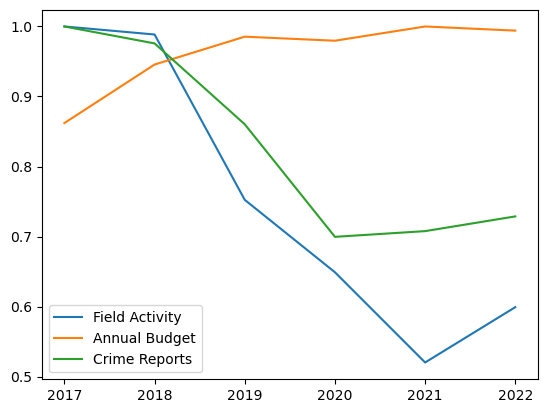

In [12]:
years = [i for i in range(2017, 2023)]
field = [size17, size18, size19, size20, size21, size22]
budgets = [budget17, budget18, budget19, budget20, budget21, budget22]
crimes = [numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

std_field = [i/max(field) for i in field]
std_budgets = [i/max(budgets) for i in budgets]
std_crimes = [i/max(crimes) for i in crimes]

df = pd.DataFrame({'Field Activity': std_field, 'Annual Budget': std_budgets, 
                   'Crime Reports': std_crimes},
                   index=years)
df.plot.line()

Text(0, 0.5, 'Annual Operating Budget ($100,000,000)')

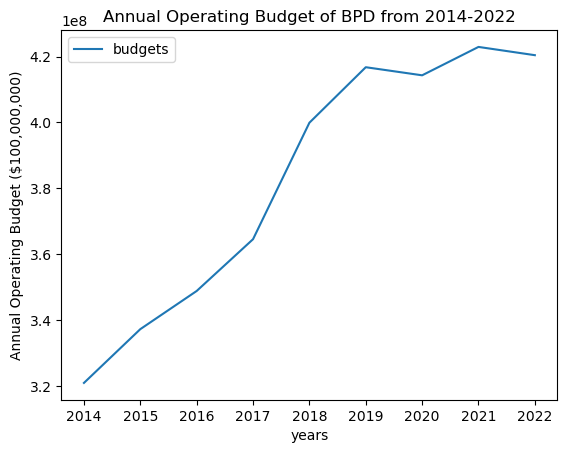

In [105]:
#field 17-22
#crime 15-22
#budget 14-22
years = [i for i in range(2014, 2023)]
field = [size17, size18, size19, size20, size21, size22]
budgets = [budget14, budget15, budget16, budget17, budget18, budget19, budget20, budget21, budget22]
crimes = [numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

df = pd.DataFrame({'years': years, 'budgets': budgets})
df.plot.line(x='years', y='budgets')
plt.title('Annual Operating Budget of BPD from 2014-2022')
plt.ylabel('Annual Operating Budget ($100,000,000)')

Text(0, 0.5, 'Annual Crimes')

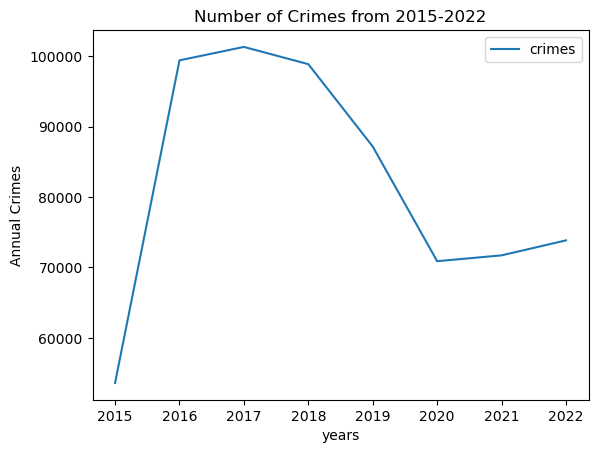

In [14]:
#field 17-22
#crime 15-22
#budget 14-22
years = [i for i in range(2015, 2023)]
crimes = [numberCrimes15, numberCrimes16, numberCrimes17, numberCrimes18, 
          numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]

df = pd.DataFrame({'years': years, 'crimes': crimes})
df.plot.line(x='years', y='crimes')
plt.title('Number of Crimes from 2015-2022')
plt.ylabel('Annual Crimes')

Text(0.5, 1.0, 'Police budget vs Overtime Pay from 2015-2022')

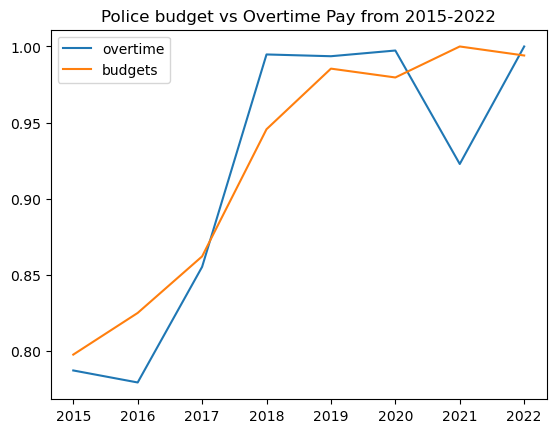

In [15]:
overtime = [61608144.93, 60989917.25, 66933649.86999999, 77855435.97999999, 77764302.50999999, 78057696.23, 72222785.03, 78265402.51]
budgets = [budget15, budget16, budget17, budget18, budget19, budget20, budget21, budget22]
years =[2015,2016,2017,2018,2019,2020,2021,2022]

std_budgets = [i/max(budgets) for i in budgets]
std_overtime = [i/max(overtime) for i in overtime]


df = pd.DataFrame({'overtime': std_overtime, 'budgets': std_budgets}, index=years)
df.plot.line()
plt.title('Police budget vs Overtime Pay from 2015-2022')

Text(0.5, 1.0, 'Number of Crime Reports vs Overtime Pay from 2015-2022')

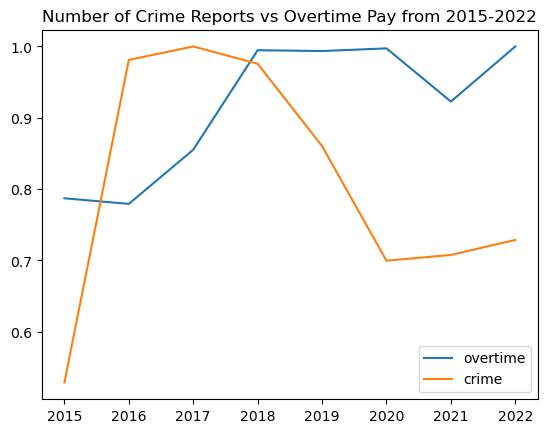

In [16]:
std_crime = [i/max(crimes) for i in crimes]

df = pd.DataFrame({'overtime': std_overtime, 'crime': std_crime}, index=years)
df.plot.line()
plt.title('Number of Crime Reports vs Overtime Pay from 2015-2022')

Text(0.5, 1.0, 'Number of Crime Reports vs Budget from 2015-2022')

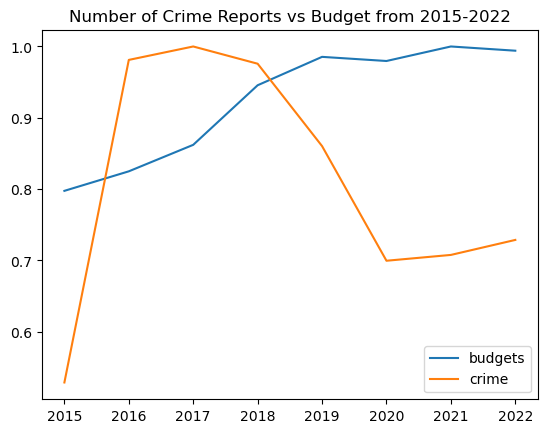

In [17]:
std_crime = [i/max(crimes) for i in crimes]

df = pd.DataFrame({'budgets': std_budgets, 'crime': std_crime}, index=years)
df.plot.line()
plt.title('Number of Crime Reports vs Budget from 2015-2022')

Text(0, 0.5, 'Standardized Score(MinMax)')

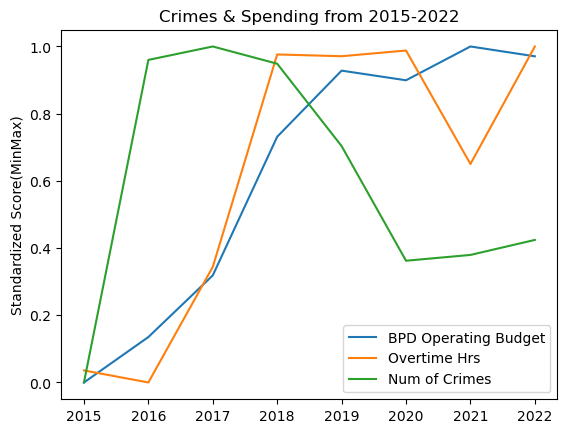

In [21]:
years = [i for i in range(2015, 2023)]
crimes = [numberCrimes15, numberCrimes16, numberCrimes17, numberCrimes18, 
          numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]
field = [size15, size16, size17, size18, size19, size20, size21, size22]
overtime = [61608144.93, 60989917.25, 66933649.86999999, 77855435.97999999, 77764302.50999999, 78057696.23, 72222785.03, 78265402.51]
budgets = [budget15, budget16, budget17, budget18, budget19, budget20, budget21, budget22]

std_field = [(i - min(field))/(max(field) - min(field)) for i in field]
std_budgets = [(i - min(budgets))/(max(budgets) - min(budgets)) for i in budgets]
std_overtime = [(i - min(overtime))/(max(overtime) - min(overtime)) for i in overtime]
std_crimes = [(i - min(crimes))/(max(crimes) - min(crimes)) for i in crimes]

df = pd.DataFrame(
    {'BPD Operating Budget': std_budgets,
    'Overtime Hrs': std_overtime, 'Num of Crimes': std_crimes}, 
    index=years)
df.plot.line()
plt.title('Crimes & Spending from 2015-2022')
plt.ylabel('Standardized Score(MinMax)')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

df = pd.DataFrame({'overtime': overtime, 'crime': crimes}, index=years)
x1=df['overtime']
y=df['crime']
x = sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

c:\Users\opres\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.166
Method:                 Least Squares   F-statistic:                  0.001352
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.972
Time:                        13:39:05   Log-Likelihood:                -88.878
No. Observations:                   8   AIC:                             181.8
Df Residuals:                       6   BIC:                             181.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.964e+04   6.75e+04      1.181      0.282   -8.54e+04    2.45e+05
overtime    3.443e-05      0.001      0.037      0.972      -0.002       0.002
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.565
Skew:                          -0.240   Prob(JB):                        0.754
Kurtosis:                       1.790   Cond. No.                     7.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df = pd.DataFrame({'budgets': budgets, 'crime': crimes}, index=years)
x1=df['budgets']
y=df['crime']
x = sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

c:\Users\opres\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.162
Method:                 Least Squares   F-statistic:                   0.02314
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.884
Time:                        13:39:05   Log-Likelihood:                -88.864
No. Observations:                   8   AIC:                             181.7
Df Residuals:                       6   BIC:                             181.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.411e+04   7.91e+04      1.189      0.279   -9.95e+04    2.88e+05
budgets    -3.071e-05      0.000     -0.152      0.884      -0.001       0.000
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.536
Skew:                          -0.424   Prob(JB):                        0.765
Kurtosis:                       2.058   Cond. No.                     4.71e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

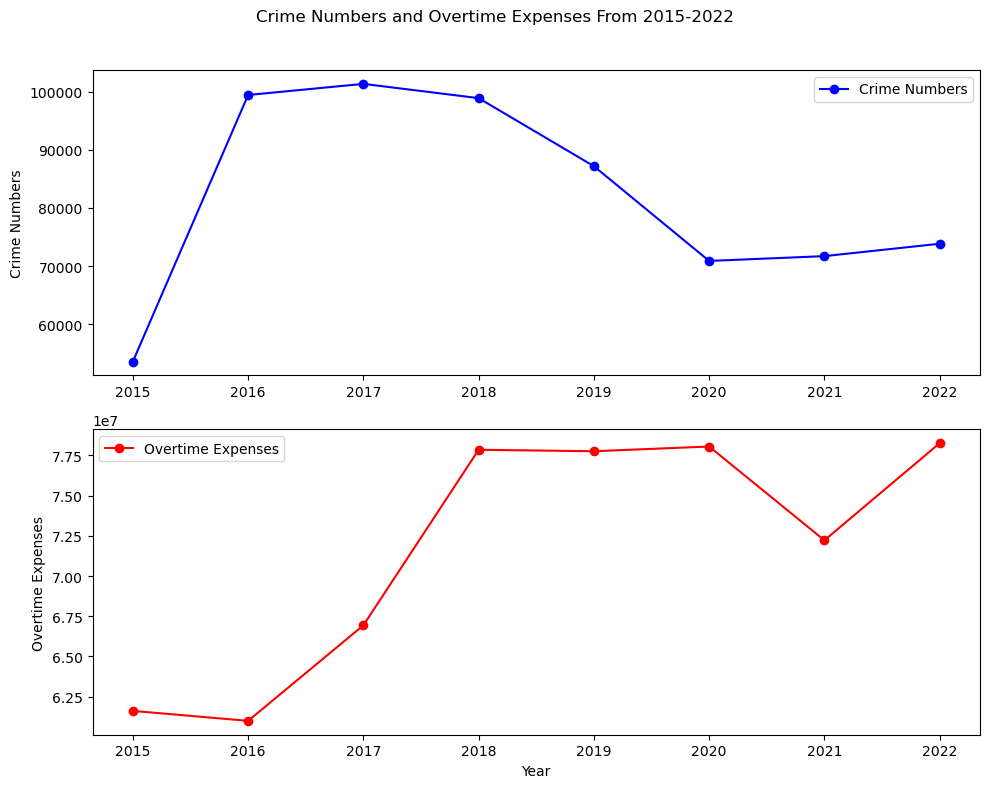

In [25]:
crimes = [numberCrimes15, numberCrimes16, numberCrimes17, numberCrimes18, numberCrimes19, numberCrimes20, numberCrimes21, numberCrimes22]
overtime = [61608144.93, 60989917.25, 66933649.86999999, 77855435.97999999, 77764302.50999999, 78057696.23, 72222785.03, 78265402.51]
years =[2015,2016,2017,2018,2019,2020,2021,2022]
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot crime numbers in the first subplot
ax1.plot(years, crimes, marker='o', color='blue', label='Crime Numbers')
ax1.set_ylabel('Crime Numbers')
ax1.legend()

# Plot overtime expenses in the second subplot
ax2.plot(years, overtime, marker='o', color='red', label='Overtime Expenses')
ax2.set_xlabel('Year')
ax2.set_ylabel('Overtime Expenses')
ax2.legend()

# Add title
fig.suptitle('Crime Numbers and Overtime Expenses From 2015-2022')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the graph
plt.show()

In [26]:
crime15['SHOOTING'] = crime15['SHOOTING'].fillna(0)
crime16['SHOOTING'] = crime16['SHOOTING'].fillna(0)
crime17['SHOOTING'] = crime17['SHOOTING'].fillna(0)
crime18['SHOOTING'] = crime18['SHOOTING'].fillna(0)
crime19['SHOOTING'] = crime19['SHOOTING'].fillna(0)
crime20['SHOOTING'] = crime20['SHOOTING'].fillna(0)
crime21['SHOOTING'] = crime21['SHOOTING'].fillna(0)
crime22['SHOOTING'] = crime22['SHOOTING'].fillna(0)

crime15['SHOOTING'] = crime15['SHOOTING'].replace('Y', 1)
crime16['SHOOTING'] = crime16['SHOOTING'].replace('Y', 1)
crime17['SHOOTING'] = crime17['SHOOTING'].replace('Y', 1)
crime18['SHOOTING'] = crime18['SHOOTING'].replace('Y', 1)
crime19['SHOOTING'] = crime19['SHOOTING'].replace('Y', 1)
crime20['SHOOTING'] = crime20['SHOOTING'].replace('Y', 1)
crime21['SHOOTING'] = crime21['SHOOTING'].replace('Y', 1)
crime22['SHOOTING'] = crime22['SHOOTING'].replace('Y', 1)

shooting15 = crime15['SHOOTING'].sum()
shooting16 = crime16['SHOOTING'].sum()
shooting17 = crime17['SHOOTING'].sum()
shooting18 = crime18['SHOOTING'].sum()
shooting19 = crime19['SHOOTING'].sum()
shooting20 = crime20['SHOOTING'].sum()
shooting21 = crime21['SHOOTING'].sum()
shooting22 = crime22['SHOOTING'].sum()


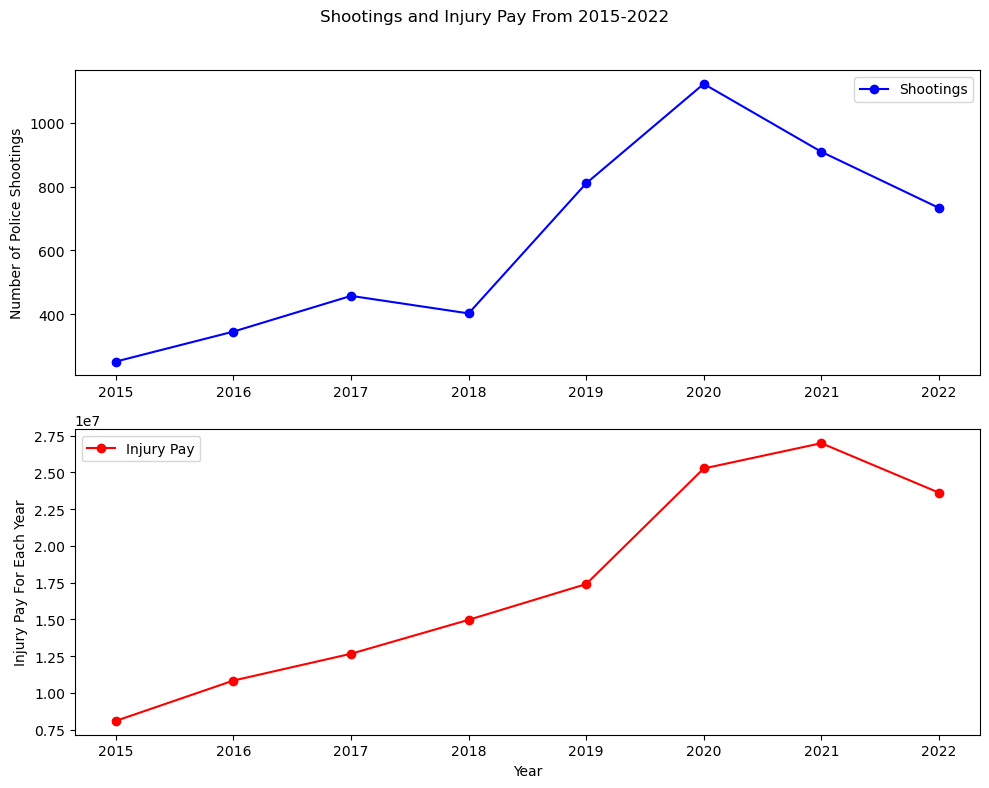

In [27]:
shootings = [shooting15, shooting16, shooting17, shooting18, shooting19, shooting20, shooting21, shooting22]
injuryTotal = [8095216.93, 10838924.379999999, 12661907.719999999, 14971892.08, 17404626.34, 25272751.17, 26994382.02, 23628467.04]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot crime numbers in the first subplot
ax1.plot(years, shootings, marker='o', color='blue', label='Shootings')
ax1.set_ylabel('Number of Police Shootings')
ax1.legend()

# Plot overtime expenses in the second subplot
ax2.plot(years, injuryTotal, marker='o', color='red', label='Injury Pay')
ax2.set_xlabel('Year')
ax2.set_ylabel('Injury Pay For Each Year')
ax2.legend()

# Add title
fig.suptitle('Shootings and Injury Pay From 2015-2022')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the graph
plt.show()


In [28]:
field2017.columns

Index(['fc_num', 'contact_date', 'contact_officer', 'contact_officer_name',
       'supervisor', 'supervisor_name', 'street', 'city', 'state', 'zip',
       'frisked', 'searchperson', 'searchvehicle', 'summonsissued',
       'stop_duration', 'circumstance', 'basis', 'vehicle_year',
       'vehicle_state', 'vehicle_make', 'vehicle_model', 'vehicle_color',
       'vehicle_style', 'vehicle_type', 'contact_reason'],
      dtype='object')

In [29]:
officerNames15 = field2015['contact_officer'].value_counts()
officerNames16 = field2016['contact_officer'].value_counts()
officerNames17 = field2017['contact_officer'].value_counts()
officerNames18 = field2018['contact_officer'].value_counts()
officerNames19 = field2019['contact_officer'].value_counts()
officerNames20 = field2020['contact_officer'].value_counts()
officerNames21 = field2021['contact_officer'].value_counts()
officerNames22 = field2022['contact_officer'].value_counts()

In [92]:
combinedOfficer = pd.concat([officerNames15, officerNames16, officerNames17, officerNames18, officerNames19, officerNames20, officerNames21, officerNames22], axis=0, sort=True)
# combinedOfficer = combinedOfficer.value_counts()
print(len(combinedOfficer))
combinedOfficer = combinedOfficer[combinedOfficer > 10]

5614


In [93]:
combinedOfficer = set(combinedOfficer.index)

len(combinedOfficer)

656

In [101]:
overtimeUsers = pd.read_csv("../data/Overtime/frequent overtime users1.csv")
overtimeUsers = overtimeUsers[overtimeUsers['Rank'] == 9]
# overtimeUsers = overtimeUsers.nlargest(191, columns="overtime_count")

overtimeUsersId = overtimeUsers['Emp_ID']

In [102]:
employeeIdOvertime = list(overtimeUsersId.array)

employeeIdOvertime = [int(x) for x in employeeIdOvertime]
employeeIdOvertime = set(employeeIdOvertime)


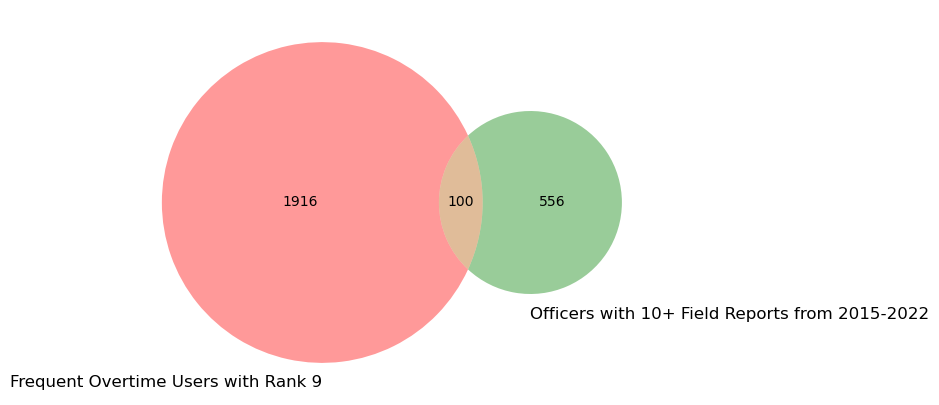

In [103]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

employee_ids1 = set(employeeIdOvertime)
employee_ids2 = combinedOfficer

plt.figure(figsize=(10, 5), facecolor='white')

venn_labels = {'10': f"Series 1 Only\n{len(employee_ids1 - employee_ids2)}", '01': f"Series 2 Only\n{len(employee_ids2 - employee_ids1)}", '11': f"Overlap\n{len(employee_ids1 & employee_ids2)}"}
venn2(subsets=(len(employee_ids1 - employee_ids2), len(employee_ids2 - employee_ids1), len(employee_ids1 & employee_ids2)),
      set_labels = ('Frequent Overtime Users with Rank 9', 'Officers with 10+ Field Reports from 2015-2022')
)
# Show the plot
plt.show()

57973


Index(['02021', '02024', '02026', '02050', '02056', '02062', '02081', '02108',
       '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118',
       '02119', '02120', '02121', '02122', '02123', '02124', '02125', '02126',
       '02127', '02128', '02129', '02130', '02131', '02132', '02133', '02134',
       '02135', '02136', '02138', '02139', '02145', '02146', '02148', '02150',
       '02151', '02169', '02186', '02188', '02199', '02201', '02203', '02205',
       '02210', '02215', '02302', '02314', '02343', '02351', '02368', '02446',
       '02452', '02453', '02458', '02465', '02467', '02472', '02474', '02492',
       '02721', '02723', '02780', '02909'],
      dtype='object')


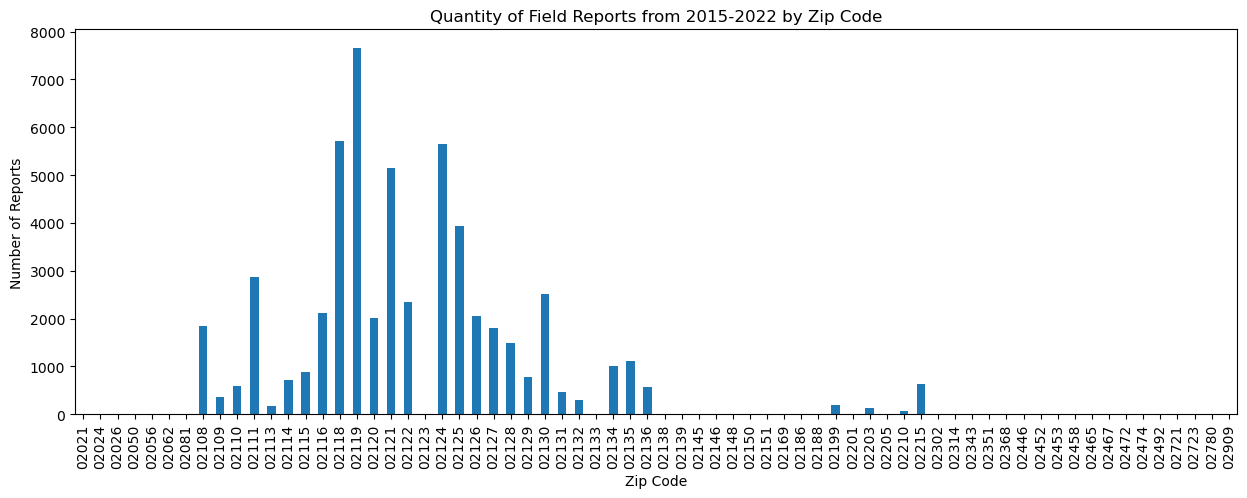

In [57]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(len(field2015) + len(field2016) + len(field2017) + len(field2018) + len(field2019) + len(field2020) + len(field2021) + len(field2022))

fiolist = [field2015, field2016, field2017, field2018, field2019, field2020, field2021, field2022]
cols_to_drop = ['fc_num', 'vehicle_year', 'vehicle_state', 'vehicle_color', 'vehicle_model', 'vehicle_style', 'vehicle_type', 'weather']

combinedField = pd.concat(fiolist, axis=0, sort=True)
combinedField.columns
combinedField.drop(columns=cols_to_drop, inplace=True)
combinedField = combinedField[combinedField['zip'].notna()]
combinedField['zip'] = combinedField['zip'].astype(str)
combinedField['zip'] = combinedField['zip'].str.split("-").str[0]
combinedField = combinedField[combinedField['zip'] != "MA"]
combinedField = combinedField[combinedField['zip'] != "99999"]


combinedField['zip'] = combinedField['zip'].astype(int).astype(str).str.zfill(5)
combinedField = combinedField[combinedField['zip'] != '00000']
combinedField = combinedField[combinedField['zip'].str[0:2] == '02']
combinedField['zip'] = combinedField['zip'].dropna()

zips = combinedField['zip'].value_counts()
zips = zips.sort_index()
print(zips.index)
zips.plot(kind='bar', figsize=(15,5), title="Quantity of Field Reports from 2015-2022 by Zip Code", xlabel='Zip Code', ylabel='Number of Reports')

plt.show()


C:\Users\opres\AppData\Local\Temp\ipykernel_13000\294742162.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f'../data/Crime Incident/crime{i}_zip.csv')
C:\Users\opres\AppData\Local\Temp\ipykernel_13000\294742162.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f'../data/Crime Incident/crime{i}_zip.csv')
C:\Users\opres\AppData\Local\Temp\ipykernel_13000\294742162.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f'../data/Crime Incident/crime{i}_zip.csv')
C:\Users\opres\AppData\Local\Temp\ipykernel_13000\294742162.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f'../data/Crime Incident/crime{i}_zip.csv')


<Axes: xlabel='Zip Code', ylabel='Number of Reports'>

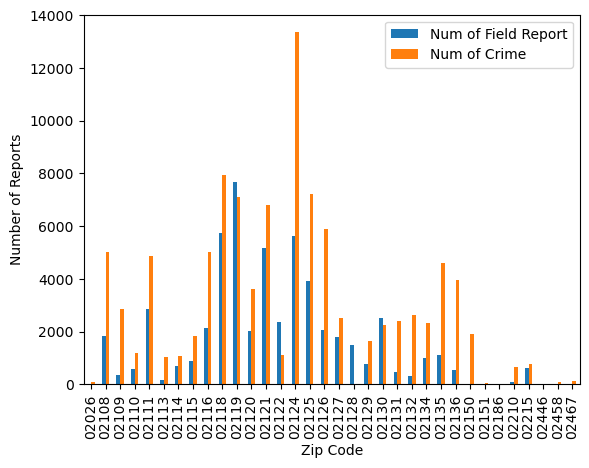

In [58]:
total_crimes = pd.DataFrame()
count=0
for i in range(15,23):
    temp = pd.read_csv(f'../data/Crime Incident/crime{i}_zip.csv')
    count+=temp.shape[0]
    total_crimes = pd.concat([total_crimes, temp['Zip']])

total_crimes.columns = ['zip']
total_crimes = total_crimes[total_crimes['zip'].notna()]
total_crimes['zip'] = total_crimes['zip'].astype(int).astype(str).str.zfill(5)
total_crimes['freq'] = 1

crimes_zip = total_crimes.groupby('zip').count()
crimes_zip = crimes_zip.reset_index()


field_zip = zips.reset_index()
field_zip.columns = ['zip', 'Num of Field Report']

crimes_zip.columns = ['zip', 'Num of Crime']

total_zip = pd.merge(field_zip, crimes_zip, on='zip', how='inner')
total_zip.plot(kind='bar', xlabel='Zip Code', ylabel='Number of Reports',
x='zip')

{'2108': 96, '2109': 58, '2110': 52, '2111': 124, '2113': 21, '2114': 57, '2115': 128, '2116': 271, '2118': 843, '2119': 427, '2120': 103, '2121': 390, '2122': 227, '2124': 460, '2125': 332, '2126': 158, '2127': 113, '2128': 82, '2129': 27, '2130': 165, '2131': 55, '2132': 23, '2134': 57, '2135': 91, '2136': 53, '2199': 31, '2215': 102}


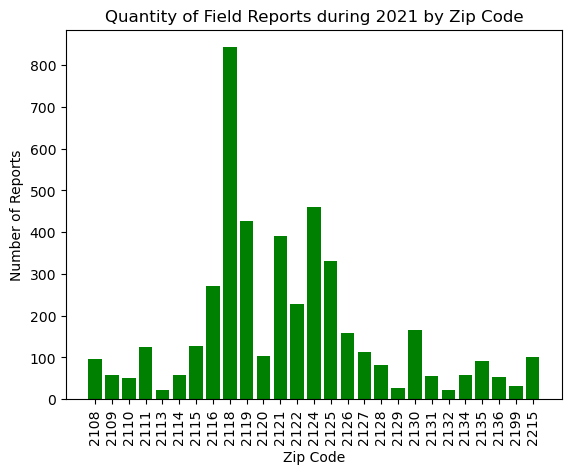

In [59]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fiolist = [field2021]
cols_to_drop = ['fc_num', 'vehicle_year', 'vehicle_state', 'vehicle_color', 'vehicle_model', 'vehicle_style', 'vehicle_type', 'weather']
# for df in fiolist:
#     for col in cols_to_drop:
#         df.drop(col, axis=1, inplace=True)
zipcodes = {}
for df in fiolist:
    for code in df['zip']:
        # assert type(code) == int
        # if type(code) != str or code == None or '-' in code or code == 'nan' or code == '00000':
        #     continue
        if code in zipcodes:
            zipcodes[code] += 1
        else:
            zipcodes[code] = 1
    topop = []
    for x in zipcodes:
        if zipcodes[x] < 10:
            topop.append(x)
    for x in topop:
        zipcodes.pop(x)
ziplist = []
for key in zipcodes:
    ziplist.append(int(key))
ziplist = sorted(ziplist)
new_dict = {int(key): value for key, value in zipcodes.items()}
zipdict = {}
for x in ziplist:
    zipdict[str(x)] = new_dict[x]
print(zipdict)
plt.bar(zipdict.keys(), zipdict.values(), color='g') #this is in ascending value of zipcodes
# plt.bar(zipcodes.keys(), zipcodes.values(), color='g') #this is in random order of zipcodes
plt.xticks(rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('Number of Reports')
plt.title('Quantity of Field Reports during 2021 by Zip Code')
plt.show()

The code below uses the SearchEngine package to get the zipcode from the lat/log for the crime data. This process was really computationally heavy so it is commented out. Instead you can find the files with the zipcode in the crime data folder with "_zip"

In [60]:
# # google colab
# from google.colab import drive
# from google.colab import files
# import geopy
# import pandas as pd
# from tqdm import tqdm
# import time 
# import numpy as np
# from uszipcode import SearchEngine
# import matplotlib.pyplot as plt

# # Upload a file
# uploaded = files.upload()
# drive.mount('/content/drive')

# # Read the uploaded file into a DataFrame
# for i in range(15,23):
#     file_name = f'crime{i}.csv'
#     output_file_name = file_name[:-4] + '_zip' + file_name[-4:]
#     output_file_name
#     data = pd.read_csv(file_name)

#     def get_zip(row, search, lat_field, lon_field):
#         try:
#             zip_info = search.by_coordinates(row[lat_field], row[lon_field], returns=1)
#             return zip_info[0].to_dict()["zipcode"]
#         except (IndexError, KeyError):
#             return None
#     tic1 = time.time()
#     for i in range(0,len(data),10000):
#         tic = time.time()
#         search = SearchEngine()

#         data['Zip'] = data[i:i+10000].apply(
#             lambda row: get_zip(row, search, lat_field='Lat', lon_field='Long'),
#             axis=1
#         )

#         toc = time.time()
#         print(f"{toc-tic} seconds")

#     toc1 = time.time()
#     print(f"Total time: {toc1-tic1} seconds")

#     dtype = {
#         'INCIDENT_NUMBER': 'object',
#         'REPORTING_AREA': 'object'
#     }

# destination_directory = '/content/drive/My Drive/'
# data.to_csv(destination_directory + output_file_name)